<a href="https://colab.research.google.com/github/ShehanPer/ImageClassification/blob/main/Pytorch_NumberClasifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18043134.07it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488866.31it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3351924.33it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4016556.77it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data.data.shape
test_data.data.shape

torch.Size([10000, 28, 28])

In [5]:
# prompt: how to get the labels of my data\

# Get the labels of the training data
train_labels = train_data.targets

# Print the first 10 labels
print(train_labels[:10])


tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


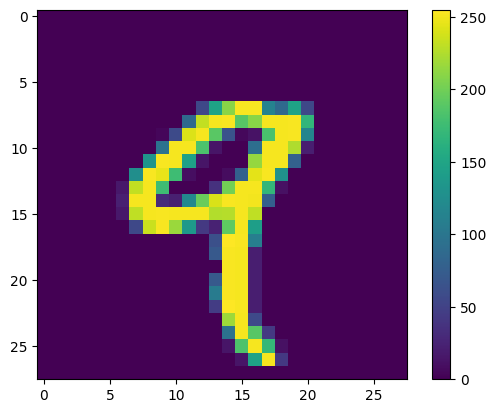

In [6]:
plt.imshow(train_data.data[4].numpy())
plt.colorbar()
plt.show()

In [7]:
lable_new = F.one_hot(train_labels, num_classes=10)
lable_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [8]:
class CTDataset(Dataset):
    def __init__(self, ds):
        self.x = ds.data
        self.y = ds.targets
        self.x = self.x/255
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [9]:
train_ds = CTDataset(train_data)
test_ds = CTDataset(test_data)

In [10]:
len(train_ds)
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
xs,ys = train_ds[0:4]
print(xs.shape)
print(ys.shape)

torch.Size([4, 28, 28])
torch.Size([4, 10])


In [12]:
train_dl = DataLoader(train_ds,batch_size=5)

In [13]:
for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [14]:
L =nn.CrossEntropyLoss()

class Mynn(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [15]:
f = Mynn()

In [16]:
f(xs)

tensor([[ 0.0211, -0.0453, -0.0707, -0.1359,  0.0581,  0.0783,  0.0483, -0.0812,
         -0.1570, -0.1057],
        [ 0.0130, -0.0070, -0.0551, -0.0838,  0.0854,  0.0510,  0.0442, -0.1304,
         -0.1380, -0.1181],
        [ 0.0298, -0.0268, -0.0704, -0.0646,  0.0317,  0.0962,  0.0121, -0.1043,
         -0.1391, -0.1038],
        [ 0.0316, -0.0492, -0.0832, -0.0879,  0.0350,  0.1083,  0.0392, -0.0961,
         -0.1103, -0.0930]], grad_fn=<SqueezeBackward0>)

In [17]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [18]:
L(f(xs),ys)

tensor(2.2527, dtype=torch.float64, grad_fn=<DivBackward1>)

In [19]:
def train_model(dl,f,n_epochs = 20):
  opt = SGD(f.parameters(),lr=0.01)
  L = nn.CrossEntropyLoss()

  losses = []
  epochs = []
  for epoch in range(n_epochs):
    print(f'Epoch{epoch}')
    N = len(dl)
    for i,(x,y)in enumerate(dl):
      opt.zero_grad()
      loss_value = L(f(xs),ys)
      loss_value.backward()
      opt.step()
      #store training data
      epochs.append(epoch+i/N)
      losses.append(loss_value.item())
  return np.array(epochs),np.array(losses)



In [20]:
epoch_data,loss_data = train_model(train_dl,f)

Epoch0
Epoch1
Epoch2
Epoch3
Epoch4
Epoch5
Epoch6
Epoch7
Epoch8
Epoch9
Epoch10
Epoch11
Epoch12
Epoch13
Epoch14
Epoch15
Epoch16
Epoch17
Epoch18
Epoch19


In [37]:
epoch_data.shape

(240000,)

Text(0.5, 1.0, 'Training Loss')

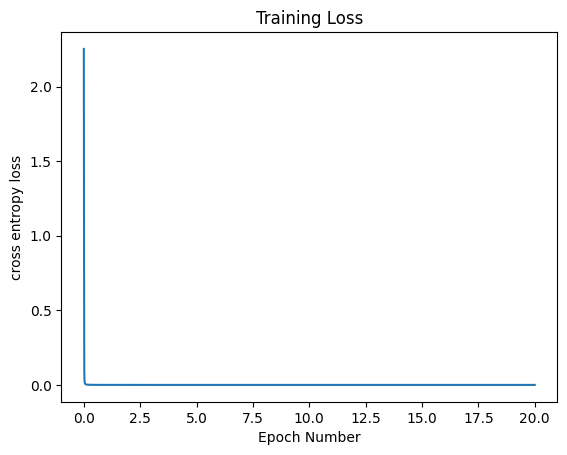

In [34]:
plt.plot(epoch_data,loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('cross entropy loss')
plt.title('Training Loss')
#why this didint show data


Text(0.5, 1.0, 'Training Loss')

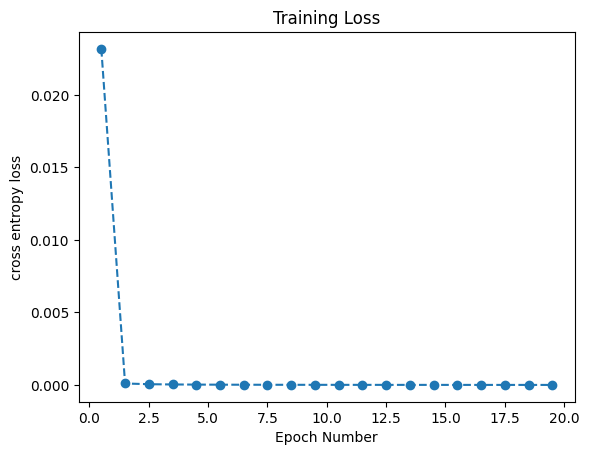

In [39]:
epoch_data_avg = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avg = loss_data.reshape(20,-1).mean(axis=1)

plt.plot(epoch_data_avg,loss_data_avg,'o--')
plt.xlabel('Epoch Number')
plt.ylabel('cross entropy loss')
plt.title('Training Loss')

<ipython-input-42-d1ea35a40b37>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,4,i+1)


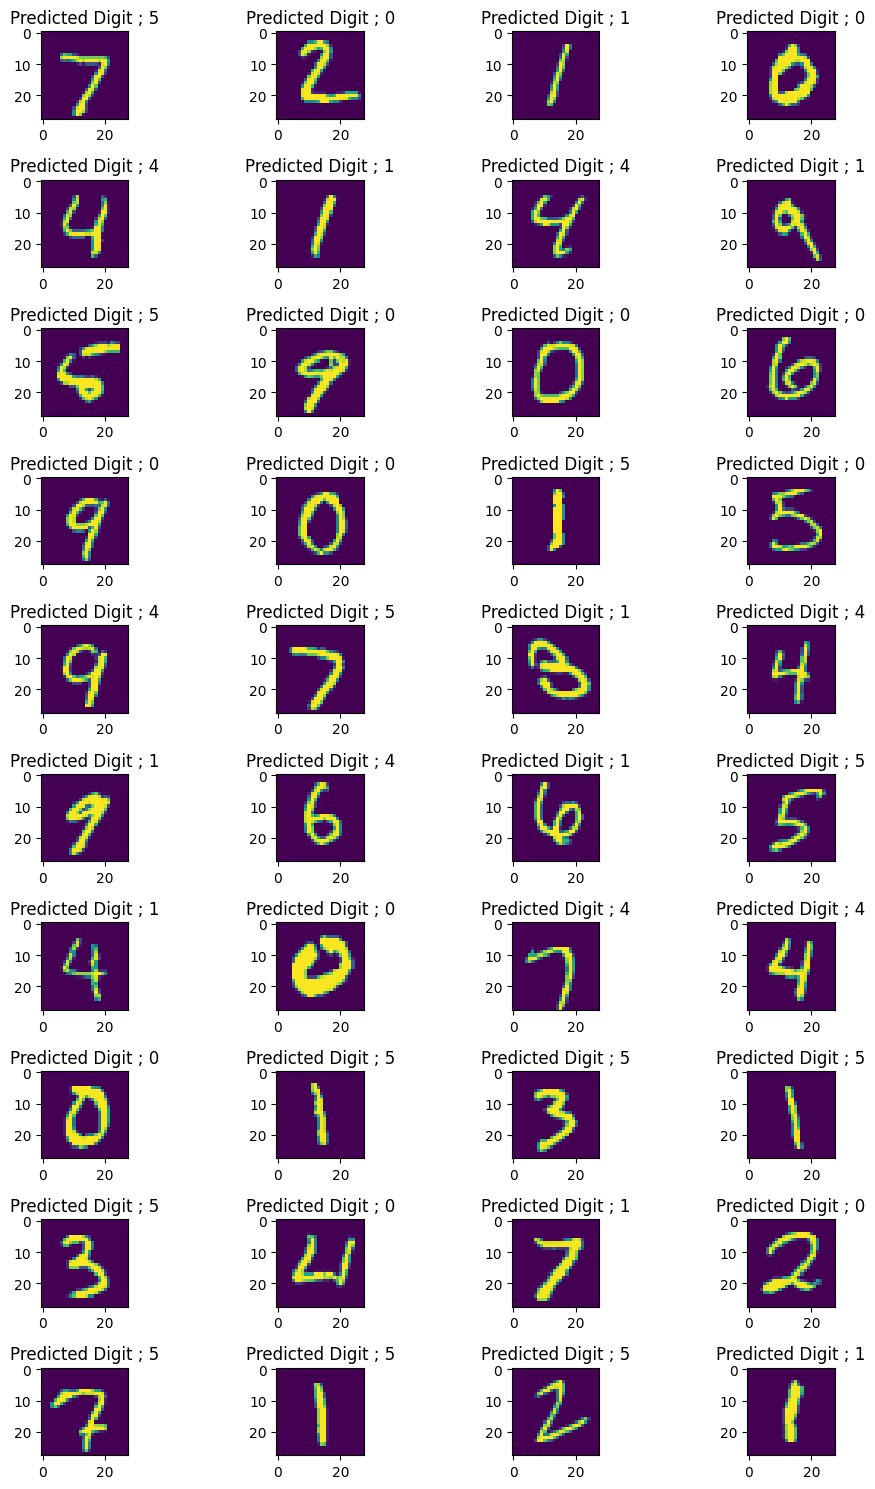

In [42]:
xs,ys = test_ds[0:2000]
yhats =f(xs).argmax(axis=1)

fig,ax = plt.subplots(20,4,figsize=(10,15))
for i in range(40):
  plt.subplot(10,4,i+1)
  plt.imshow(xs[i])
  plt.title(f'Predicted Digit ; {yhats[i]}')
fig.tight_layout()
plt.show()